# Optična rotacija v sladkorni vodi

## Uvod

Optična rotacija je pojav, kjer kiralne molekule, kot so saharoza, zavrtijo ravnino polarizirane svetlobe. Ta pojav je odvisen od:
- koncentracije snovi \(c\),
- dolžine poti svetlobe \(l\),
- valovne dolžine svetlobe \($\lambda$).

## Osnovna enačba

Kot rotacije $\alpha$ je povezan s specifično rotacijo $[\alpha]_\lambda$ preko:

$\alpha(\lambda) = [\alpha]_\lambda \cdot c \cdot l$

Specifična rotacija je funkcija valovne dolžine in jo lahko približamo z Drudejevim modelom:


$[\alpha](\lambda) = \frac{k \lambda^2}{\lambda^2 - A^2}$

kjer sta \(k\) in \(A\) parametra, ki ju bomo določili s prilagajanjem modela na meritve.

## Namen eksperimenta

Merili bomo kot rotacije za različne koncentracije saharoze pri dveh valovnih dolžinah (rdeča ~650 nm, zelena ~532 nm). Poleg tega bomo primerjali dve vrsti medu, naravnega in sintetičnega, da pokažemo razliko v optični aktivnosti.

# Korak 2: Priprava podatkov za eksperiment in zapis napak

---

## 1. Meritve in negotovosti

**Merjene količine:**
- Koncentracija saharoze, $c$ (npr. v g/mL)
- Valovna dolžina, $\lambda$ (v nm, poznana od lasera)
- Kot rotacije, $\alpha$ (v stopinjah, iz polarimetra)

**Negotovosti:**
- Absolutna napaka koncentracije, $\Delta c$  
  Primer: če tehtnica meri s 0.001 g natančnostjo in pripravljaš raztopino, oceni to napako.
- Absolutna napaka kota rotacije, $\Delta \alpha$  
  Podatki od polarimetra (npr. ±0.05°) ali ocena glede na merilni instrument.
- Napaka valovne dolžine ni potrebna, če uporabljaš laserske diode, ker so valovne dolžine zelo točne.

---

## 2. Postopek priprave podatkov z napakami

Izpis meritve z napako:

$$
c \pm \Delta c, \quad \lambda, \quad \alpha \pm \Delta \alpha
$$

**Primer (za eno meritev):**

| koncentracija (g/mL) | napaka koncentracije (g/mL) | valovna dolžina (nm) | kot rotacije (°) | napaka kota (°) |
|----------------------|-----------------------------|----------------------|------------------|-----------------|
| 0.05                 | 0.001                       | 650                  | 3.50             | 0.05            |

---

## 3. Enačbe za nadaljnjo analizo

Kot rotacije je povezan s koncentracijo in dolžino poti (zaenkrat je dolžina poti konstantna, npr. 1 dm):

$$
\alpha = [\alpha]_\lambda \cdot c \cdot l
$$

Če boš meril pri različnih koncentracijah, lahko izračunaš specifično rotacijo $[\alpha]_\lambda$ s formulo:

$$
[\alpha]_\lambda = \frac{\alpha}{c \cdot l}
$$

---


---

## 5. Primer navodil za pripravo podatkov

1. Pripravi sladkorno raztopino različnih koncentracij $c$ (npr. 0.01, 0.03, 0.05 g/mL). Pri pripravi upoštevaj merilno napako tehtnice ali volumna.
2. Izmeri kot rotacije $\alpha$ pri vsaki koncentraciji za laserja z valovnimi dolžinami $\lambda_1 = 650\, \mathrm{nm}$ in $\lambda_2 = 532\, \mathrm{nm}$.
3. Zapiši meritve v tabelo z vsemi vrednostmi in njihovimi napakami.
4. Izračunaj specifično rotacijo po formuli zgoraj ter izračunaj njeno negotovost.

---



$[\alpha](\lambda) = \frac{k \lambda^2}{\lambda^2 - A^2}$


# Analiza specifične rotacije z uporabo Drudejeve enačbe

Merili smo specifično rotacijo $[\alpha](\lambda)$ pri različnih valovnih dolžinah. Za te podatke želimo določiti konstanti $k$ in $A$, ki opisujeta disperzijo optične aktivnosti po enačbi:

$$
[\alpha](\lambda) = \frac{k \lambda^2}{\lambda^2 - A^2}
$$

kjer je:
- $\lambda$ valovna dolžina (v nm),
- $[\alpha](\lambda)$ specifična rotacija (v ° / (g/mL·dm)),
- $k$, $A$ sta konstanti, ki ju bomo določili z ujemanjem.

Spodaj izvedemo nelinearno prileganje (curve fitting) z uporabo `scipy.optimize.curve_fit`.


In [72]:
# Uvoz knjižnic
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

## Podatki iz eksperimenta

Zabeležili smo naslednje podatke:
- koncentracija je enaka za vse meritve, zato lahko primerjamo le specifično rotacijo.

In [73]:
# Podatki (lambda v nm, alpha v deg/(g/mL·dm))
lambda_vals = np.array([532, 589, 650])  # nm
alpha_vals = np.array([25.2, 20.0, 17.1])  # specifična rotacija

# Če imaš napake, lahko dodaš:
# alpha_err = np.array([0.3, 0.3, 0.3])

## Definicija modela

Uporabimo model:

$$
[\alpha](\lambda) = \frac{k \lambda^2}{\lambda^2 - A^2}
$$

In [74]:
# Drudejeva enačba
def drude_model(lam, k, A):
    return (k * lam**2) / (lam**2 - A**2)

## Prileganje modela eksperimentalnim podatkom

In [75]:
# Tu vnesemo svoje podatke
lambda_vals = np.array([650, 590, 532, 480])  # valovne dolžine v nm
lambda_errs = np.array([5, 5, 5, 5])  # napake valovnih dolžin
alpha_vals = np.array([15.2, 16.7, 18.4, 19.9])  # specifična rotacija
alpha_errs = np.array([0.3, 0.3, 0.3, 0.3])      # napake specifične rotacije


Ujemajoči parametri:
  k = 12.25 ± 0.35
  A = 300.36 ± 8.90 nm


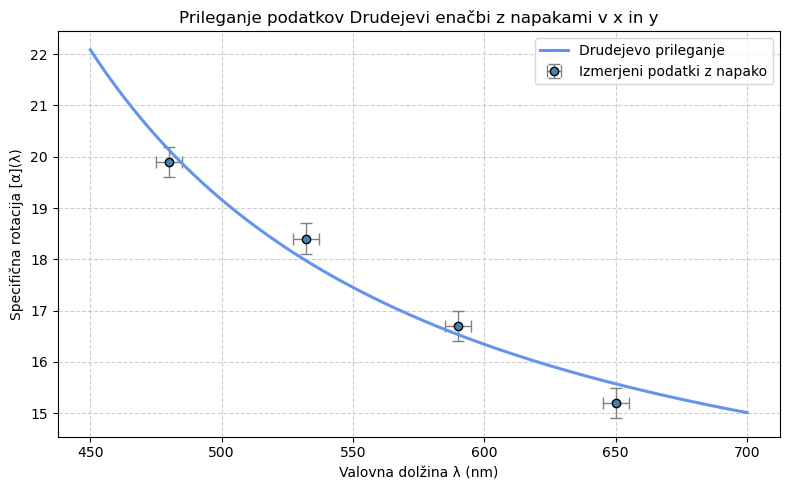

In [76]:
# Uvozimo potrebne knjižnice
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Drudejeva funkcija
def drude(lambda_nm, k, A):
    return (k * lambda_nm**2) / (lambda_nm**2 - A**2)


# Prileganje z upoštevanjem napak v y (x napake ne vplivajo na fit)
params, cov = curve_fit(drude, lambda_vals, alpha_vals, sigma=alpha_errs, absolute_sigma=True, p0=(1e4, 200))
k_fit, A_fit = params
k_err, A_err = np.sqrt(np.diag(cov))

# Izpis rezultatov
print("Ujemajoči parametri:")
print(f"  k = {k_fit:.2f} ± {k_err:.2f}")
print(f"  A = {A_fit:.2f} ± {A_err:.2f} nm")

# Priprava za prikaz prileganja
lambda_fit = np.linspace(450, 700, 300)
alpha_fit = drude(lambda_fit, k_fit, A_fit)

# Risanje grafa z error bar-i v obeh smereh
plt.figure(figsize=(8, 5))

plt.errorbar(
    lambda_vals,
    alpha_vals,
    xerr=lambda_errs,
    yerr=alpha_errs,
    fmt='o',
    markersize=6,
    markerfacecolor='steelblue',
    markeredgecolor='black',
    ecolor='gray',
    elinewidth=1,
    capsize=4,
    label='Izmerjeni podatki z napako'
)

# Prileganje funkcije
plt.plot(lambda_fit, alpha_fit, color='cornflowerblue', linewidth=2.2, label='Drudejevo prileganje')

# Oznake in estetika
plt.xlabel('Valovna dolžina λ (nm)')
plt.ylabel('Specifična rotacija [α](λ)')
plt.title('Prileganje podatkov Drudejevi enačbi z napakami v x in y')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

# Dejanske meritve

In [77]:
# Dolžina cevi v dm
L_dm = 11.5 
abs_L_dm = 0.5  # napaka dolžine cevi v dm
rel_L_dm = abs_L_dm / L_dm  # relativna napaka dolžine cevi

In [78]:
import pandas as pd

# Uvoz podatkov iz Excel datoteke 'meritve.xlsx'
df_meritve = pd.read_excel('meritve.xlsx')

# Prikaz prvih nekaj vrstic za pregled
df_meritve.head()

,c,\alpha r,\alpha z
0,0.00,68,73
1,0.03,90,96
2,0.05,102,110
3,0.07,115,126
4,0.09,131,136


Napake meritev



In [79]:
# Volumen tekočine v mL
V_mL = 3000
abs_V_mL = 60  # napaka volumna v mL
rel_V_mL = abs_V_mL / V_mL  # relativna napaka volumna
print(f"Relativna napaka volumna: {rel_V_mL:.2f} ({rel_V_mL*100:.1f}%)")

Relativna napaka volumna: 0.02 (2.0%)


In [80]:
# napaka mase v g
abs_m0 = 0
abs_m = 3 # napaka mase v g
# Izračun abs_m / (c * V_mL) za vsako koncentracijo c v df_meritve (vključno z 0)
rel_m_error = []
for c in df_meritve['c']:
    if c != 0:
        value = abs_m / (c * V_mL)
    else:
        value = np.nan  # ali np.inf, če želiš označiti nedoločeno
    rel_m_error.append(value)

rel_m_error  # seznam rezultatov za vsako c


[nan,
 0.03333333333333333,
 0.02,
 0.014285714285714284,
 0.011111111111111112,
 0.01]

Meritve z odšteto začetno vrednostno

In [81]:
df_standard = df_meritve.copy().assign(
    **{
        '\\alpha r': df_meritve['\\alpha r'] - df_meritve['\\alpha r'].iloc[0],
        '\\alpha z': df_meritve['\\alpha z'] - df_meritve['\\alpha z'].iloc[0]
    }
)

df_standard

,c,\alpha r,\alpha z
0,0.00,0,0
1,0.03,22,23
2,0.05,34,37
3,0.07,47,53
4,0.09,63,63
5,0.10,69,70


In [82]:
abs_rot = 2
rel_rot_err_r = [
    abs_rot / row['\\alpha r']
    for idx, row in df_standard.iterrows()
    if idx > 0 and row['\\alpha r'] != 0
]
rel_rot_err_r

[np.float64(0.09090909090909091),
 np.float64(0.058823529411764705),
 np.float64(0.0425531914893617),
 np.float64(0.031746031746031744),
 np.float64(0.028985507246376812)]

In [83]:

rel_rot_err_z = [
    abs_rot / row['\\alpha z']
    for idx, row in df_standard.iterrows()
    if idx > 0 and row['\\alpha z'] != 0
]
rel_rot_err_z

[np.float64(0.08695652173913043),
 np.float64(0.05405405405405406),
 np.float64(0.03773584905660377),
 np.float64(0.031746031746031744),
 np.float64(0.02857142857142857)]

## Izračun [α] za vsako meritve

$[\alpha] = \frac{\alpha}{c \cdot L}$

### rdeča

In [84]:
# Izračun seznama specifičnih rotacij za rdečo (drugi stolpec, vrstice > 0)
spec_rot_r = [
    row['\\alpha r'] / (row['c'] * L_dm)
    for idx, row in df_standard.iterrows()
    if idx > 0 and row['c'] != 0
]
print(spec_rot_r)

# Izračun relativnih napak za vsako koncentracijo (vrstice > 0 in c != 0)
# Izračun relativnih napak za vsako koncentracijo (vrstice > 0 in c != 0), vključno z rel_rot_err_r
rel_errors_r = [
    rel_L_dm + rel_m + rel_V_mL + rel_rot_err_r[idx - 1]
    for idx, rel_m in enumerate(rel_m_error)
    if idx > 0 and df_standard.loc[idx, 'c'] != 0
]
rel_errors_r


[np.float64(63.76811594202899), np.float64(59.13043478260869), np.float64(58.38509316770186), np.float64(60.86956521739131), np.float64(59.99999999999999)]


[np.float64(0.18772068511198947),
 np.float64(0.14230179028132994),
 np.float64(0.1203171666446412),
 np.float64(0.10633540372670808),
 np.float64(0.10246376811594203)]

$[\alpha]_{c=0.030} = 43\left(1 \pm 0.36\right)$ \
$[\alpha]_{c=0.050} = 47\left(1 \pm 0.23\right)$ \
$[\alpha]_{c=0.070} = 50\left(1 \pm 0.17\right)$ \
$[\alpha]_{c=0.090} = 54\left(1 \pm 0.15\right)$ \
$[\alpha]_{c=0.100} = 54\left(1 \pm 0.14\right)$ 

## zelena


In [85]:
# Izračun seznama specifičnih rotacij za zeleno (tretji stolpec, vrstice > 0)
spec_rot_z = [
    row['\\alpha z'] / (row['c'] * L_dm)
    for idx, row in df_standard.iterrows()
    if idx > 0 and row['c'] != 0
]
print(spec_rot_z)

# Izračun relativnih napak za vsako koncentracijo (vrstice > 0 in c != 0)
rel_errors_z = [
    rel_L_dm + rel_m + rel_V_mL + rel_rot_err_z[idx - 1]
    for idx, rel_m in enumerate(rel_m_error)
    if idx > 0 and df_standard.loc[idx, 'c'] != 0
]
rel_errors_z


[np.float64(66.66666666666667), np.float64(64.34782608695652), np.float64(65.83850931677019), np.float64(60.86956521739131), np.float64(60.8695652173913)]


[np.float64(0.18376811594202896),
 np.float64(0.13753231492361928),
 np.float64(0.11549982421188326),
 np.float64(0.10633540372670808),
 np.float64(0.10204968944099378)]

$[\alpha]_{c=0.030} = 49\left(1 \pm 0.33\right)$ \
$[\alpha]_{c=0.050} = 54\left(1 \pm 0.21\right)$ \
$[\alpha]_{c=0.070} = 58\left(1 \pm 0.16\right)$ \
$[\alpha]_{c=0.090} = 55\left(1 \pm 0.14\right)$ \
$[\alpha]_{c=0.100} = 56\left(1 \pm 0.14\right)$ 

## Priprava za analizo z Drudejevo metodo

$$
[\alpha](\lambda) = \frac{k \lambda^2}{\lambda^2 - A^2}
$$


### valovne dolžine laserjev

In [86]:
lambda_r = 635
lambda_z = 532

In [87]:
# Tu vnesemo svoje podatke
lambda_vals = [635, 635, 635, 635, 635, 532, 532, 532, 532,532]  # valovne dolžine v nm
lambda_errs = [1] * len(lambda_vals)  # predpostavljamo napako ±1 nm za vsako valovno dolžino



alpha_vals = np.concatenate((spec_rot_r, spec_rot_z))  # specifična rotacija

alpha_errs_r = [val * rel for val, rel in zip(spec_rot_r, rel_errors_r)]
alpha_errs_z = [val * rel for val, rel in zip(spec_rot_z, rel_errors_z)]
# alpha_errs = np.concatenate((alpha_errs_r, alpha_errs_z))  # napake specifične rotacije
alpha_errs = 10*[2]

print(alpha_vals)
print(alpha_errs)

[63.76811594 59.13043478 58.38509317 60.86956522 60.         66.66666667
 64.34782609 65.83850932 60.86956522 60.86956522]
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


Ujemajoči parametri:
  k = 53.88 ± 2.82
  A = 209.00 ± 34.94 nm


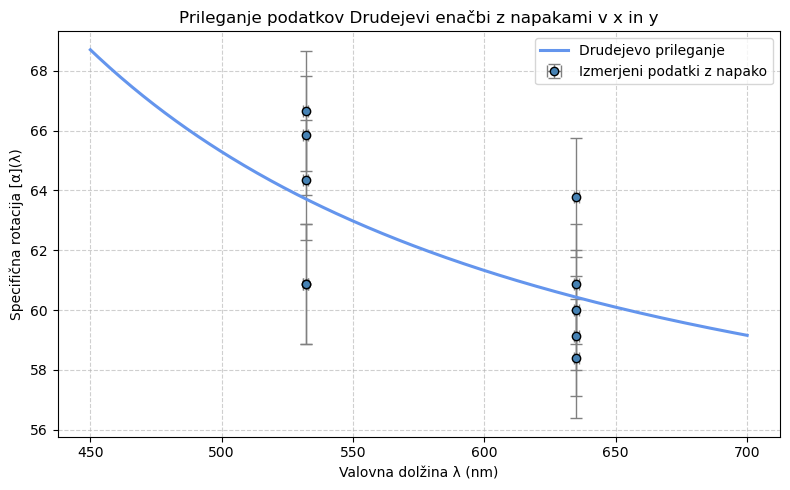

In [88]:
# Uvozimo potrebne knjižnice
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Drudejeva funkcija
def drude(lambda_nm, k, A):
    return (k * lambda_nm**2) / (lambda_nm**2 - A**2)


# Prileganje z upoštevanjem napak v y (x napake ne vplivajo na fit)
params, cov = curve_fit(drude, lambda_vals, alpha_vals, sigma=alpha_errs, absolute_sigma=True, p0=(1e4, 200))
k_fit, A_fit = params
k_err, A_err = np.sqrt(np.diag(cov))

# Izpis rezultatov
print("Ujemajoči parametri:")
print(f"  k = {k_fit:.2f} ± {k_err:.2f}")
print(f"  A = {A_fit:.2f} ± {A_err:.2f} nm")

# Priprava za prikaz prileganja
lambda_fit = np.linspace(450, 700, 300)
alpha_fit = drude(lambda_fit, k_fit, A_fit)

# Risanje grafa z error bar-i v obeh smereh
plt.figure(figsize=(8, 5))

plt.errorbar(
    lambda_vals,
    alpha_vals,
    xerr=lambda_errs,
    yerr=alpha_errs,
    fmt='o',
    markersize=6,
    markerfacecolor='steelblue',
    markeredgecolor='black',
    ecolor='gray',
    elinewidth=1,
    capsize=4,
    label='Izmerjeni podatki z napako'
)

# Prileganje funkcije
plt.plot(lambda_fit, alpha_fit, color='cornflowerblue', linewidth=2.2, label='Drudejevo prileganje')

# Oznake in estetika
plt.xlabel('Valovna dolžina λ (nm)')
plt.ylabel('Specifična rotacija [α](λ)')
plt.title('Prileganje podatkov Drudejevi enačbi z napakami v x in y')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

In [89]:
k_rel = k_err / k_fit
A_rel = A_err / A_fit

print(f"Relativna napaka k: {k_rel:.2%}")
print(f"Relativna napaka A: {A_rel:.2%}")


Relativna napaka k: 5.24%
Relativna napaka A: 16.72%


In [90]:
from sympy import symbols, diff, simplify

# Define symbols
k, A, lam = symbols('k A lam')

# Define the function
alpha = k * lam**2 / (lam**2 - A**2)

# Partial derivatives
d_alpha_dk = simplify(diff(alpha, k))
d_alpha_dA = simplify(diff(alpha, A))
d_alpha_dlam = simplify(diff(alpha, lam))

print("∂[α]/∂k =", d_alpha_dk)
print("∂[α]/∂A =", d_alpha_dA)
print("∂[α]/∂λ =", d_alpha_dlam)

∂[α]/∂k = -lam**2/(A**2 - lam**2)
∂[α]/∂A = 2*A*k*lam**2/(A**2 - lam**2)**2
∂[α]/∂λ = -2*A**2*k*lam/(A**2 - lam**2)**2



Delni odvodi Drudejeve funkcije:


$\frac{\partial [\alpha]}{\partial k} = \frac{-\lambda^2}{A^2 - \lambda^2}$ 

$\frac{\partial [\alpha]}{\partial A} = \frac{2A k \lambda^2}{(A^2 - \lambda^2)^2}$ 



In [91]:
from sympy import lambdify

# Izračun specifične rotacije in njene napake za modri laser (npr. λ = 450 nm)
lambda_blue = 450  # nm

# Uporabi Drudejev model in napake parametrov
alpha_blue = (k_fit * lambda_blue**2) / (lambda_blue**2 - A_fit**2)

# Delni odvodi po k in A (že definirani: d_alpha_dk, d_alpha_dA)

d_alpha_dk_func = lambdify((k, A, lam), d_alpha_dk)
d_alpha_dA_func = lambdify((k, A, lam), d_alpha_dA)

d_alpha_dk_val = d_alpha_dk_func(k_fit, A_fit, lambda_blue)
d_alpha_dA_val = d_alpha_dA_func(k_fit, A_fit, lambda_blue)

# Skupna napaka (približek, zanemarimo korelacijo)
delta_alpha_blue = abs(d_alpha_dk_val) * k_err + abs(d_alpha_dA_val) * A_err

print(f"[α](450 nm) = {alpha_blue:.2f} ± {delta_alpha_blue:.2f}")

[α](450 nm) = 68.70 ± 9.91


In [ ]:
from sympy import lambdify

# Izračun specifične rotacije in njene napake za rdeči (npr. λ = 450 nm)
lambda_red = 653  # nm

# Uporabi Drudejev model in napake parametrov
alpha_red = (k_fit * lambda_red**2) / (lambda_red**2 - A_fit**2)

# Delni odvodi po k in A (že definirani: d_alpha_dk, d_alpha_dA)

d_alpha_dk_func = lambdify((k, A, lam), d_alpha_dk)
d_alpha_dA_func = lambdify((k, A, lam), d_alpha_dA)

d_alpha_dk_val = d_alpha_dk_func(k_fit, A_fit, lambda_blue)
d_alpha_dA_val = d_alpha_dA_func(k_fit, A_fit, lambda_blue)

# Skupna napaka (približek, zanemarimo korelacijo)
delta_alpha_red = abs(d_alpha_dk_val) * k_err + abs(d_alpha_dA_val) * A_err

print(f"[α](450 nm) = {alpha_red:.2f} ± {delta_alpha_red:.2f}")

[α](450 nm) = 60.03 ± 9.91


In [ ]:
from sympy import lambdify

# Izračun specifične rotacije in njene napake za zeleni laser 
lambda_green = 532  # nm

# Uporabi Drudejev model in napake parametrov
alpha_green = (k_fit * lambda_green**2) / (lambda_green**2 - A_fit**2)

# Delni odvodi po k in A (že definirani: d_alpha_dk, d_alpha_dA)

d_alpha_dk_func = lambdify((k, A, lam), d_alpha_dk)
d_alpha_dA_func = lambdify((k, A, lam), d_alpha_dA)

d_alpha_dk_val = d_alpha_dk_func(k_fit, A_fit, lambda_blue)
d_alpha_dA_val = d_alpha_dA_func(k_fit, A_fit, lambda_blue)

# Skupna napaka (približek, zanemarimo korelacijo)
delta_alpha_green = abs(d_alpha_dk_val) * k_err + abs(d_alpha_dA_val) * A_err

print(f"[α](532 nm) = {alpha_green:.2f} ± {delta_alpha_green:.2f}")

[α](532 nm) = 63.72 ± 9.91


## popravki


Ujemajoči parametri za dve resonanci:
  k1 = -17513668.09 ± 2267691970566002.50
  A1 = 58101.67 ± 3433630049510.88 nm
  k2 = 43357.32 ± 5432257334504.55
  A2 = 2993.21 ± 90031478144.31 nm

Prilepljena enačba:
[α](λ) = (-17513668.09 ± 2267691970566002.50) * λ² / (λ² - (58101.67 ± 3433630049510.88)²) + (43357.32 ± 5432257334504.55) * λ² / (λ² - (2993.21 ± 90031478144.31)²)


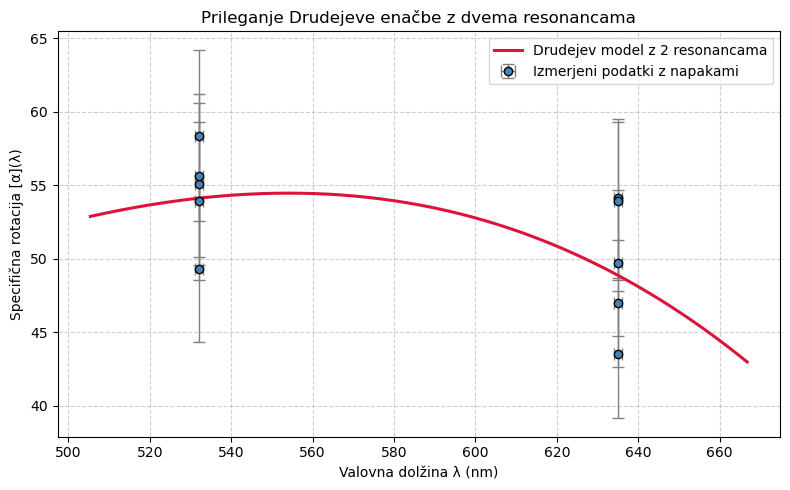

In [94]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Podatki
lambda_vals = np.array([635, 635, 635, 635, 635, 532, 532, 532, 532, 532])  # nm
alpha_vals = np.array([43.47826087, 46.95652174, 49.68944099, 54.10628019, 53.91304348,
                       49.27536232, 53.91304348, 58.38509317, 55.07246377, 55.65217391])
alpha_errs = np.array([4.347826087, 4.347826087, 4.968944099, 5.410628019, 5.391304348,
                       4.927536232, 5.391304348, 5.838509316, 5.507246377, 5.565217391])
lambda_errs = np.array([1] * len(lambda_vals))  # ±1 nm napake na valovne dolžine

# Model z dvema resonancama
def drude_two(lambda_nm, k1, A1, k2, A2):
    return (k1 * lambda_nm**2) / (lambda_nm**2 - A1**2) + (k2 * lambda_nm**2) / (lambda_nm**2 - A2**2)

# Približni začetni parametri (lahko prilagodiš glede na intuicijo)
p0 = [1e4, 500, 1e4, 600]

# Fitanje
params, cov = curve_fit(drude_two, lambda_vals, alpha_vals, sigma=alpha_errs, absolute_sigma=True, p0=p0)

k1_fit, A1_fit, k2_fit, A2_fit = params
k1_err, A1_err, k2_err, A2_err = np.sqrt(np.diag(cov))

# Izpis parametrov z napakami
print("Ujemajoči parametri za dve resonanci:")
print(f"  k1 = {k1_fit:.2f} ± {k1_err:.2f}")
print(f"  A1 = {A1_fit:.2f} ± {A1_err:.2f} nm")
print(f"  k2 = {k2_fit:.2f} ± {k2_err:.2f}")
print(f"  A2 = {A2_fit:.2f} ± {A2_err:.2f} nm")

# Izpis enačbe s parametri in napakami
print("\nPrilepljena enačba:")
print(f"[α](λ) = ({k1_fit:.2f} ± {k1_err:.2f}) * λ² / (λ² - ({A1_fit:.2f} ± {A1_err:.2f})²) + "
      f"({k2_fit:.2f} ± {k2_err:.2f}) * λ² / (λ² - ({A2_fit:.2f} ± {A2_err:.2f})²)")

# Priprava za risanje
lambda_fit = np.linspace(min(lambda_vals)*0.95, max(lambda_vals)*1.05, 300)
alpha_fit = drude_two(lambda_fit, k1_fit, A1_fit, k2_fit, A2_fit)

# Risanje
plt.figure(figsize=(8, 5))
plt.errorbar(lambda_vals, alpha_vals, xerr=lambda_errs, yerr=alpha_errs, fmt='o', 
             markersize=6, markerfacecolor='steelblue', markeredgecolor='black', 
             ecolor='gray', elinewidth=1, capsize=4, label='Izmerjeni podatki z napakami')
plt.plot(lambda_fit, alpha_fit, color='crimson', linewidth=2.2, label='Drudejev model z 2 resonancama')
plt.xlabel('Valovna dolžina λ (nm)')
plt.ylabel('Specifična rotacija [α](λ)')
plt.title('Prileganje Drudejeve enačbe z dvema resonancama')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

# MED
